In [1]:
import tensorflow as tf

In [2]:
import os
import shutil
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
data_from_kaggle = "D:\\Nural Networks\\ece5831-2023- HW's\\Kaggle_Data\\train"
data_dirname = "D:\\Nural Networks\\ece5831-2023- HW's\\Dogs_vs_Cats"

In [4]:
def make_dataset(subset_name, start_idx, end_idx):
    for category in { "cat", "dog" }:
       # data_dirname/subset_name/categoroy 
       dir = f"{data_dirname}\\{subset_name}\\{category}"
       # print(dir)
       os.makedirs(dir)
       fnames = [f"{category}.{i}.jpg" for i in range(start_idx, end_idx)]
       # print(fnames)
       for fname in fnames:
                 
             
                 shutil.copyfile(src=f"{data_from_kaggle}\\{fname}", dst=f"{dir}\\{fname}")

In [26]:
make_dataset("train", 0, 1000)
make_dataset("validation", 7500, 8001)
# total: 12,500
make_dataset("test", 10000, 11001)

In [5]:
from keras.applications.vgg16 import VGG16
model = VGG16()

In [6]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [7]:
from tensorflow.keras.utils import image_dataset_from_directory
from keras.models import Model
from keras.layers import Dense

In [8]:
batch_size = 32
train_dataset = image_dataset_from_directory(f"{data_dirname}/train", image_size=(224, 224), batch_size=batch_size)
validation_dataset = image_dataset_from_directory(f"{data_dirname}/validation", image_size=(224, 224), batch_size=batch_size)
test_dataset = image_dataset_from_directory(f"{data_dirname}/test", image_size=(224, 224), batch_size=batch_size)

Found 2000 files belonging to 2 classes.
Found 1002 files belonging to 2 classes.
Found 2002 files belonging to 2 classes.


In [28]:
for i, l in train_dataset:
    print(l)

## 0 is Cats
## 1 is Dogs   

tf.Tensor([1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 1 1], shape=(32,), dtype=int32)
tf.Tensor([1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0], shape=(32,), dtype=int32)
tf.Tensor([1 1 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1], shape=(32,), dtype=int32)
tf.Tensor([1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1], shape=(32,), dtype=int32)
tf.Tensor([1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 1 1], shape=(32,), dtype=int32)
tf.Tensor([1 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0], shape=(32,), dtype=int32)
tf.Tensor([1 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0], shape=(32,), dtype=int32)
tf.Tensor([0 0 1 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1], shape=(32,), dtype=int32)
tf.Tensor([0 1 1 1 0 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 0], shape=(32,), dtype=int32)
tf.Tensor([1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0 0 1 1 0 0 0 1 1 1 0 

In [33]:
num_classes = 1
model.layers.pop()

for layer in model.layers:
    layer.trainable = False

predictions = Dense(num_classes, activation ='sigmoid')(model.layers[-1].output)

modified_model = Model(inputs = model.input, outputs = predictions)

In [34]:
modified_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [35]:
modified_model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [36]:
modified_model.fit(train_dataset, validation_data=validation_dataset, epochs=5)

Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
63/63 [==============================] - ETA: 0s - loss: 0.6819 - accuracy: 0.8005WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000018E16F35D38> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) a

In [37]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [38]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_dir = r"D:\Nural Networks\ece5831-2023- HW's\Dogs_vs_Cats\test"

In [39]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')

Found 2002 images belonging to 2 classes.


In [52]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import decode_predictions


In [87]:
image_path = r"D:\Nural Networks\ece5831-2023- HW's\Dogs_vs_Cats\test\dog\dog.10127.jpg"
image = load_img(image_path, target_size=(224,224))
image = img_to_array(image)
image = np.expand_dims(image, axis=0) 
preds = model.predict(image)

1/1 [==============================] - 0s 102ms/step


In [69]:


# Visualize predictions for 10 images each from dogs and cats
class_names = ['cat', 'dog']

# Function to plot images with predictions
def plot_images_with_predictions(model, generator, class_names):
    num_dog_images = 0
    num_cat_images = 0
    i = 0
    plt.figure(figsize=(12, 8))
    
    while num_dog_images < 10 or num_cat_images < 10:
        img_batch, true_labels_batch = generator[i % len(generator)]
        
        # Get predictions for the batch
        predictions_batch = model.predict(img_batch)
        
        for j in range(img_batch.shape[0]):
            img = np.expand_dims(img_batch[j], axis=0)
            true_label = true_labels_batch[j]
            
            # Get prediction for the current image
            predicted_probability = predictions_batch[j]
            if predicted_probability>= 0.5000000:
                predicted_label = class_names[1]
            else:
                predicted_label = class_names[0]      # Use threshold 0.5
            
            # Check if the image is a dog or cat and if the quota is not reached
            if true_label == 1 and num_dog_images < 10:
                num_dog_images += 1
                # Plot dog image
                plt.subplot(4, 5, num_dog_images)
                plt.imshow(img.squeeze())
                plt.title(f"True: {class_names[int(true_label)]}, Predicted: {predicted_label}")
                plt.axis('off')
            elif true_label == 0 and num_cat_images < 10:
                num_cat_images += 1
                # Plot cat image
                plt.subplot(4, 5, num_cat_images + 10)  # Start from the second row
                plt.imshow(img.squeeze())
                plt.title(f"True: {class_names[int(true_label)]}, Predicted: {predicted_label}")
                plt.axis('off')

            if num_dog_images >= 10 and num_cat_images >= 10:
                break
        
        i += 1

    plt.show()

1/1 [==============================] - 2s 2s/step


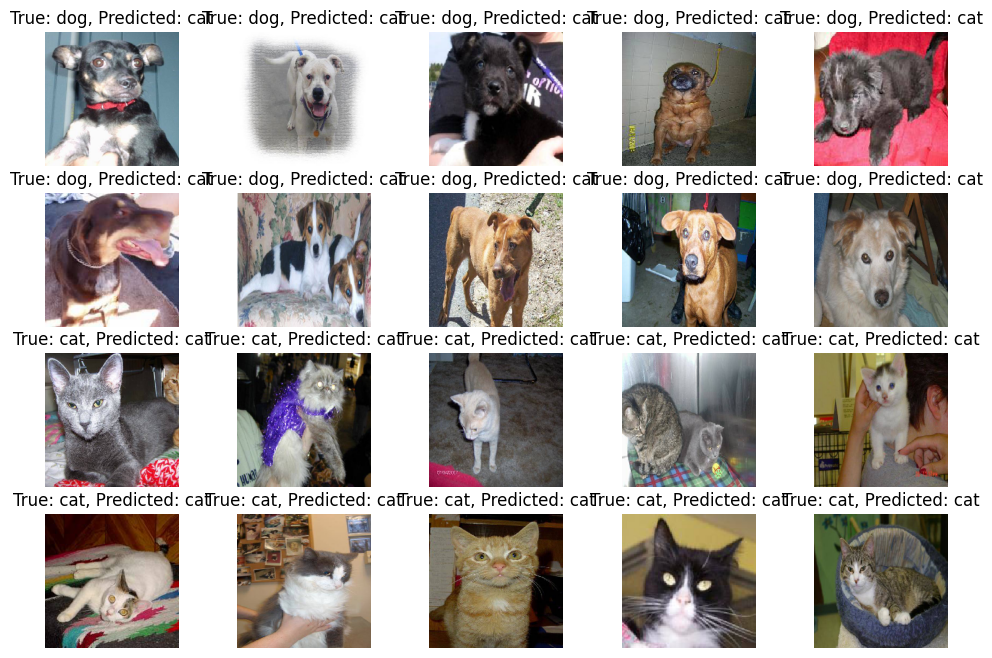

In [70]:
plot_images_with_predictions(modified_model, test_generator, class_names)

In [72]:
from keras.models import Model
from keras.layers import Dense, Conv2D, Flatten
from keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

block5_end_index = 15

# Get layers of the VGG16 model up to block5_end_index
layers = base_model.layers[:block5_end_index + 1]

# Define your new convolutional layer
new_conv_layer = Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding='same')

# Replace the last layers of block5 with new_conv_layer
modified_layers = []
for layer in layers:
    if layer.name.startswith('block5_conv3'):  # Replace the last Conv2D layer in block5
        modified_layers.append(new_conv_layer)
    else:
        modified_layers.append(layer)

# Create a model with modified block5
modified_block5 = Model(inputs=base_model.input, outputs=modified_layers[-1].output)


# Set layers before block5_end_index as non-trainable
for layer in modified_block5.layers[:block5_end_index + 1]:
    layer.trainable = False

x = Flatten()(modified_block5.output)
predictions = Dense(1, activation='sigmoid')(x)  # Adjust units to 1 for binary classification

model = Model(inputs=modified_block5.input, outputs=predictions)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



In [73]:
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [74]:
model.fit(train_dataset, validation_data=validation_dataset, epochs=5)

Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
63/63 [==============================] - ETA: 0s - loss: 54.9387 - accuracy: 0.8295WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000018E12A6E288> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) 

In [77]:
# Visualize predictions for 10 images each from dogs and cats
class_names = ['cat', 'dog']

# Function to plot images with predictions
def plot_images_with_predictions(model, generator, class_names):
    num_dog_images = 0
    num_cat_images = 0
    i = 0
    plt.figure(figsize=(12, 8))
    
    while num_dog_images < 10 or num_cat_images < 10:
        img_batch, true_labels_batch = generator[i % len(generator)]
        
        # Get predictions for the batch
        predictions_batch = model.predict(img_batch)
        
        for j in range(img_batch.shape[0]):
            img = np.expand_dims(img_batch[j], axis=0)
            true_label = true_labels_batch[j]
            
            # Get prediction for the current image
            predicted_probability = predictions_batch[j]
            if predicted_probability>= 0.5:
                predicted_label = class_names[1]
            else:
                predicted_label = class_names[0]      # Use threshold 0.5
            
            # Check if the image is a dog or cat and if the quota is not reached
            if true_label == 1 and num_dog_images < 10:
                num_dog_images += 1
                # Plot dog image
                plt.subplot(4, 5, num_dog_images)
                plt.imshow(img.squeeze())
                plt.title(f"True: {class_names[int(true_label)]}, Predicted: {predicted_label}")
                plt.axis('off')
            elif true_label == 0 and num_cat_images < 10:
                num_cat_images += 1
                # Plot cat image
                plt.subplot(4, 5, num_cat_images + 10)  # Start from the second row
                plt.imshow(img.squeeze())
                plt.title(f"True: {class_names[int(true_label)]}, Predicted: {predicted_label}")
                plt.axis('off')

            if num_dog_images >= 10 and num_cat_images >= 10:
                break
        
        i += 1

    plt.show()

1/1 [==============================] - 2s 2s/step


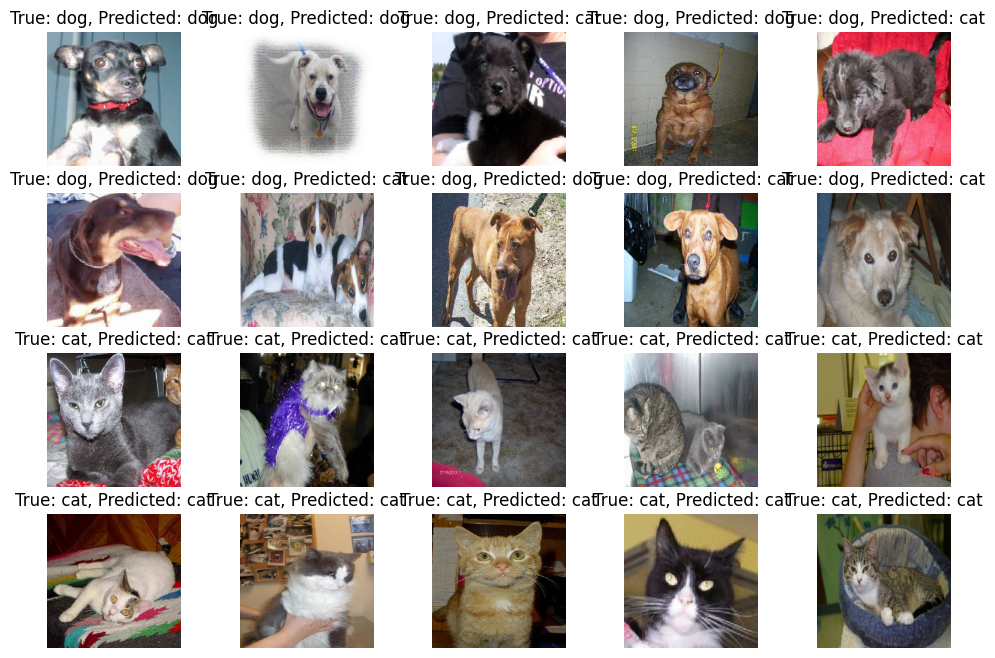

In [78]:
plot_images_with_predictions(model, test_generator, class_names)